# Exercícios de Machine Learning
## Academia QADS

### Disponibilizado pelo professor Nasser Boan 
___
<br><br>
Murilo Garcia  
**E-mail:** murilogmamaral@gmail.com  
**Linkedin:** https://www.linkedin.com/in/murilogmamaral/

___
## Contexto

Um sistema de compartilhamento de bicicletas é um serviço de transporte compartilhado no qual as bicicletas são disponibilizadas para uso compartilhado por indivíduos em um base de curto prazo por um preço ou grátis. Muitos sistemas de compartilhamento de bicicletas permitem que as pessoas peçam emprestadas uma bicicleta de uma doca e a devolvam em outra doca pertencente ao mesmo sistema. As docas são bicicletários especiais que travam a bicicleta e só a liberam pelo controle do computador. O usuário insere as informações de pagamento e o computador desbloqueia uma bicicleta. O usuário devolve a bicicleta colocando-a no encaixe, que a trava no lugar.


![](https://midias.correiobraziliense.com.br/_midias/jpg/2021/10/11/675x450/1_whatsapp_image_2021_10_11_at_11_20_08_am-6914098.jpeg)


## Problema

A empresa TAMBICI tem perdido negócios devido a falta de previsibilidade da demanda de bicicletas em algumas cidades. Por isso contratou um cientista de dados (<b>você!!</b>) para criar um modelo que possa, de acordo com algumas características do dia prever a demanda de aluguel de biciletas. Utilizando as previsões deste modelo a empresa irá acionar as equipes de manutenção e retirar algumas bicicletas das docas para reparos e pede para que você tente manter ao máximo o nível de serviço (ou seja, minimizar a possibilidade de uma pessoa procurar uma bicicleta e ela ter sido retirada para manutenção ou alugada - erro), logo prever corretamente a demanda para cada dia será importante.

## Dados

Os dados que foram disponibilizados estão no arquivo <code>capitalbikeshare-complete.csv</code>. Possuindo as seguintes colunas :

1. datetime: Date and hour of the bike share data
2. count: Count of total rentals
3. holiday: Whether it is a holiday
4. workingday: Whether it is a working day (Mon-Fri except holiday)
5. temp: Temperature in Celsius
6. feels_like: “Feels like” Temperature in Celsius
7. temp_min: Lowest temperature
8. temp_max: Highest temperature
9. pressure: Air pressure
10. humidity: Relative humidity
11. wind_speed: Wind speed
12. wind_deg: Wind direction degree
13. rain_1h: Precipitation in the last 1 hour (missing when it did not rain)
14. snow_1h: Snow volume for the last 1 hour (missing when it did not snow)
15. cloud_all: Cloudiness in percentage
15. weather_main: Weather types (Rain, Snow, Extreme etc.)


## Dicas

* Vá pelo mais simples primeiros (execute teste com uma quantidade menor de features)
* Faça as transformações necessárias (features categóricas e features numéricas)
* Faça as agregações necessárias (cada linha do dataset deve representar um dia)
* Defina bem a métrica que está procurando
* Utilize um modelo como baseline (DummyRegressor)
* Compare vários modelos
* Descreva seus resultados (importância das features e outras formatos de explicabilidade de modelos)  


___
### Bibliotecas

In [1]:
# Básico para Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Pipeline / Transformação
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Modelos
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.ensemble import RandomForestRegressor # Random Forest Regressor

# Avaliação de performance dos modelos
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate

# Otimização
from sklearn.model_selection import GridSearchCV

import sklearn
sklearn.set_config(display='diagram')

# Faz com que o pandas exiba até 200 linhas
pd.set_option('display.max_rows', 200)

# Faz com que todos os plots tenham o estilo do seaborn
sns.set_theme()

___
### Carregando e inspecionando a base

In [2]:
# Carregando a base
df = pd.read_csv('datasets/bike.csv')

In [3]:
# Padronizando os nomes das colunas com letras minúsculas
df.columns = [x.lower() for x in df.columns]

In [4]:
# Inspecionando
df.head()

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,NaN,NaN,20,Clouds
1,2018-01-01 01:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,NaN,NaN,1,Clear
2,2018-01-01 02:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,NaN,NaN,1,Clear
3,2018-01-01 03:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,NaN,NaN,1,Clear
4,2018-01-01 04:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,NaN,NaN,1,Clear


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      33379 non-null  object 
 1   count         33379 non-null  int64  
 2   holiday       33379 non-null  int64  
 3   workingday    33379 non-null  int64  
 4   temp          33379 non-null  float64
 5   feels_like    33379 non-null  float64
 6   temp_min      33379 non-null  float64
 7   temp_max      33379 non-null  float64
 8   pressure      33379 non-null  int64  
 9   humidity      33379 non-null  int64  
 10  wind_speed    33379 non-null  float64
 11  wind_deg      33379 non-null  int64  
 12  rain_1h       6771 non-null   float64
 13  snow_1h       326 non-null    float64
 14  clouds_all    33379 non-null  int64  
 15  weather_main  33379 non-null  object 
dtypes: float64(7), int64(7), object(2)
memory usage: 4.1+ MB


In [6]:
df.isna().sum()

datetime            0
count               0
holiday             0
workingday          0
temp                0
feels_like          0
temp_min            0
temp_max            0
pressure            0
humidity            0
wind_speed          0
wind_deg            0
rain_1h         26608
snow_1h         33053
clouds_all          0
weather_main        0
dtype: int64

In [7]:
(df == 0).sum()

datetime            0
count              62
holiday         32357
workingday      10637
temp                4
feels_like          5
temp_min            9
temp_max            0
pressure            0
humidity            0
wind_speed       2781
wind_deg         2938
rain_1h             0
snow_1h             0
clouds_all         11
weather_main        0
dtype: int64

In [8]:
df.describe().round(2)

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all
count,33379.00,33379.00,33379.00,33379.00,33379.00,33379.00,33379.00,33379.00,33379.00,33379.00,33379.00,6771.00,326.00,33379.00
mean,333.14,0.03,0.68,15.21,14.99,13.53,16.11,1017.07,67.82,1.83,174.02,1.21,0.64,63.21
std,336.52,0.17,0.47,9.91,11.18,9.99,9.98,7.38,18.42,1.70,113.84,2.00,0.57,30.83
min,0.00,0.00,0.00,-12.79,-18.91,-15.14,-12.29,980.00,14.00,0.00,0.00,0.10,0.10,0.00
25%,59.00,0.00,0.00,6.86,5.88,5.23,7.73,1012.00,53.00,0.45,62.00,0.25,0.25,40.00
50%,236.00,0.00,1.00,15.65,15.02,13.91,16.59,1017.00,70.00,1.34,180.00,0.53,0.42,75.00
75%,495.00,0.00,1.00,23.80,24.14,21.97,24.39,1022.00,84.00,2.60,285.00,1.30,1.00,90.00
max,2038.00,1.00,1.00,36.71,43.71,35.38,38.81,1044.00,100.00,16.98,360.00,37.08,3.30,100.00


___
### Tratando outliers e valores nulos

In [9]:
# Função para analisar as interseções dos valores nulos na base
def analyse_na(df=None,marker='na'):
    if marker != 'na': df = df.replace(marker, np.nan)
    total = df.isna().sum()
    columns = total.index[(total > 0)]
    P = []
    for n in range(1,len(columns)+1):
        permut = itertools.combinations(columns,n)
        P = P + list(permut)
    P = [list(i) for i in P]
    print(f'\nNulos totais:\n-------------\n{total.sum()}\n',
          f'\nPor colunas:\n------------\n',
          pd.DataFrame({'Freq':total,'Proportion':(total/df.shape[0]).round(4)}).sort_values('Freq',ascending=False),
         sep='')
    combination = []
    intersec = []
    for i in P:
        if len(i) > 1:
            texto = ' & '.join(i)
            combination.append(texto)
            intersec.append((df[i].isna().sum(axis=1)==len(i)).sum())
    final = pd.DataFrame({'Intersection':combination,
                          'Freq':intersec,
                          'Proportion':[(x/df.shape[0]).round(4) for x in intersec]}).query('Freq > 0')
    final = final.sort_values('Freq',ascending=False).reset_index(drop=True)
    print(f'\nInterceções:\n------------\n{final.to_string(index=False)}\n')
    
# Função para tratar outliers
def treat_outliers(column=None):
    sensitivity=1.5
    q1 = np.percentile(np.array(column),25)
    q3 = np.percentile(column,75)
    iqr = q3 - q1
    limits = [(q1 - sensitivity * iqr), (q3 + sensitivity * iqr)]
    saida = []
    for v in column:
        if v < limits[0]:
            saida.append(np.nan)
        elif v > limits[1]:
            saida.append(np.nan)
        else:
            saida.append(v)
    return pd.Series(saida)

In [10]:
analyse_na(df)


Nulos totais:
-------------
59661

Por colunas:
------------
               Freq  Proportion
snow_1h       33053      0.9902
rain_1h       26608      0.7971
datetime          0      0.0000
count             0      0.0000
holiday           0      0.0000
workingday        0      0.0000
temp              0      0.0000
feels_like        0      0.0000
temp_min          0      0.0000
temp_max          0      0.0000
pressure          0      0.0000
humidity          0      0.0000
wind_speed        0      0.0000
wind_deg          0      0.0000
clouds_all        0      0.0000
weather_main      0      0.0000

Interceções:
------------
      Intersection   Freq  Proportion
 rain_1h & snow_1h  26282      0.7874



In [11]:
# Os valores nulos dessas duas colunas pegam 79% da base
# e devem ser substituídos por 0, de acordo com a instrução do problema
for c in ['rain_1h','snow_1h']: df[c] = df[c].fillna(0)

In [12]:
df.isna().sum()

datetime        0
count           0
holiday         0
workingday      0
temp            0
feels_like      0
temp_min        0
temp_max        0
pressure        0
humidity        0
wind_speed      0
wind_deg        0
rain_1h         0
snow_1h         0
clouds_all      0
weather_main    0
dtype: int64

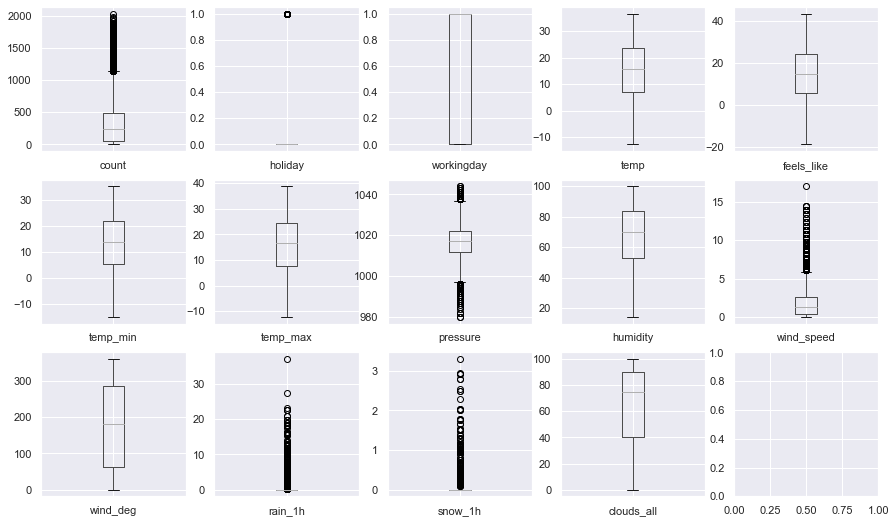

In [13]:
# Verificando outliers
files = [df[c] for c in df._get_numeric_data().columns]
_, axarr = plt.subplots(3,5,figsize=(15,9))
for data, ax in zip(files, axarr.flat): pd.DataFrame(data).boxplot(ax=ax);

___
### Tratando datas

In [15]:
df.head()

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds
1,2018-01-01 01:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear
2,2018-01-01 02:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear
3,2018-01-01 03:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,0.0,0.0,1,Clear
4,2018-01-01 04:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,0.0,0.0,1,Clear


In [16]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [17]:
df['weekday'] = df['datetime'].dt.dayofweek
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['hour'] = df['datetime'].dt.hour

___
### Análise Exploratória

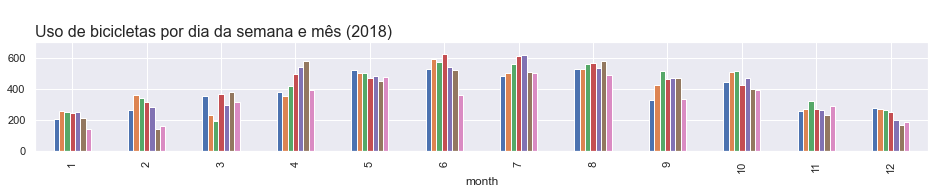

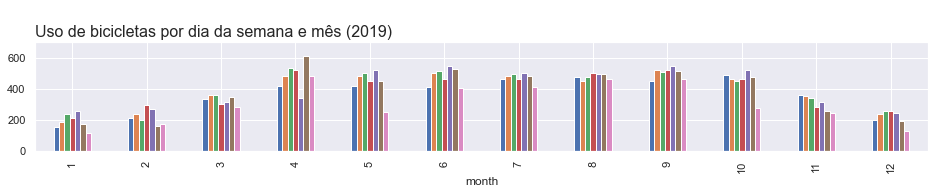

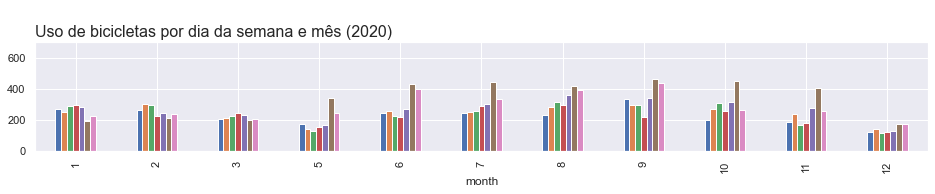

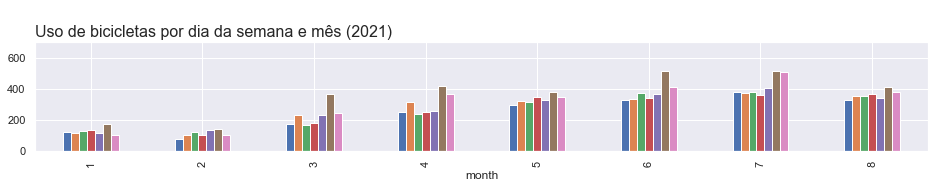

In [18]:
for y in [2018,2019,2020,2021]:
    (
         df[df.year == y]
        .pivot_table(index='month',columns='weekday',values='count',aggfunc='mean').round()
        .plot(kind='bar',figsize=(16,2),ylim=(0,700),legend=False)
    )
    plt.title(f'\nUso de bicicletas por dia da semana e mês ({y})',loc='left',fontsize=(16))
    plt.show()

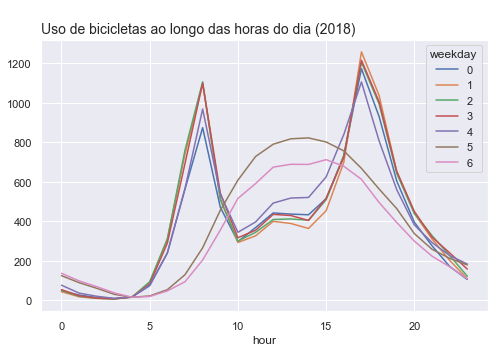

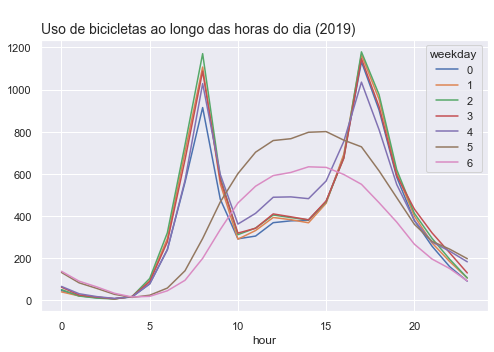

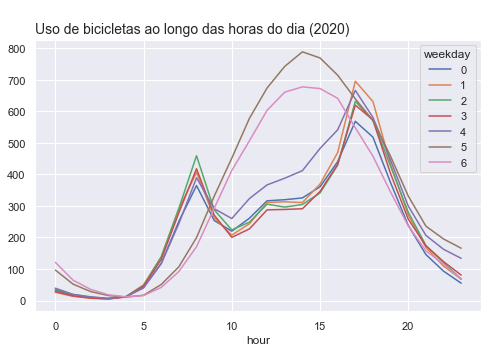

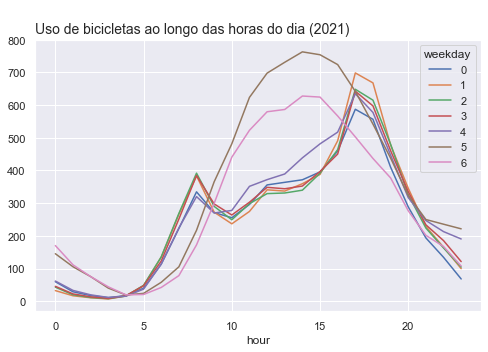

In [19]:
for y in [2018,2019,2020,2021]:
    df[df.year == y]\
    .pivot_table(index='hour',columns='weekday',values='count',aggfunc='mean').plot(figsize=(8,5))
    plt.title(f'\nUso de bicicletas ao longo das horas do dia ({y})',loc='left',fontsize=(14))
    plt.show()

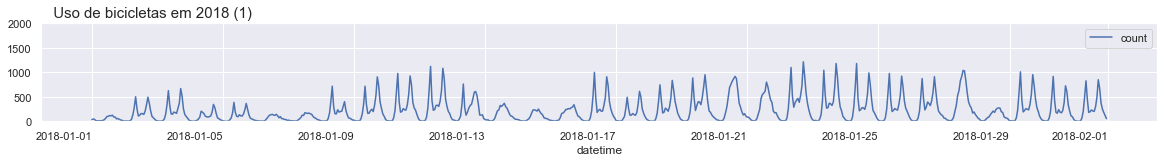

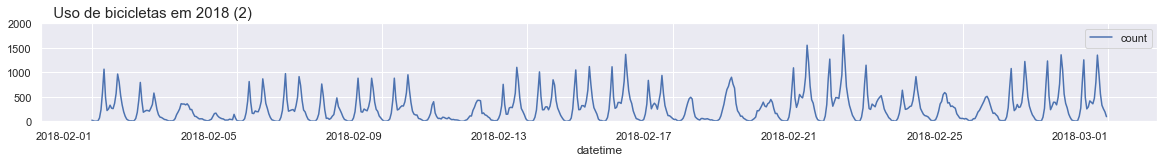

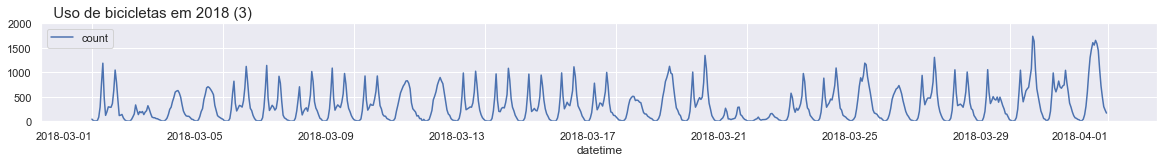

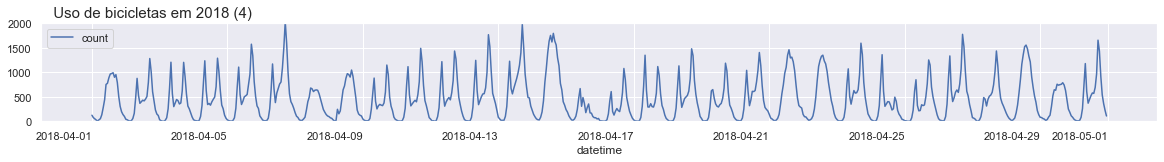

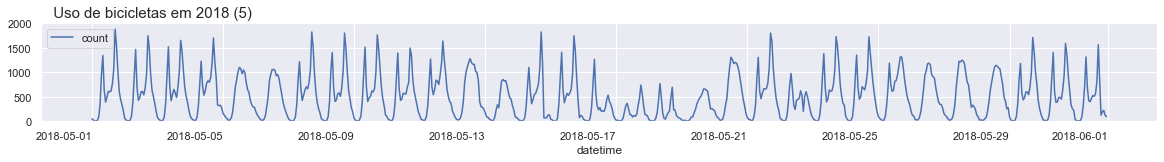

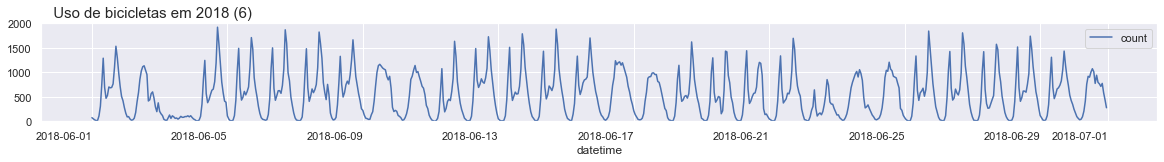

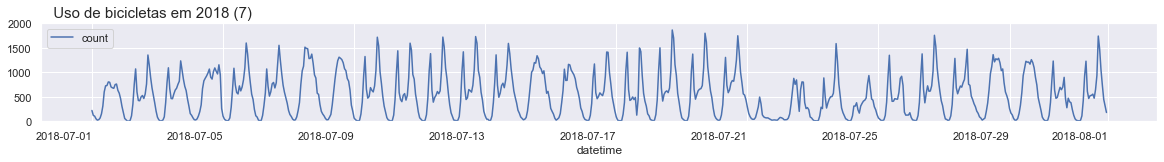

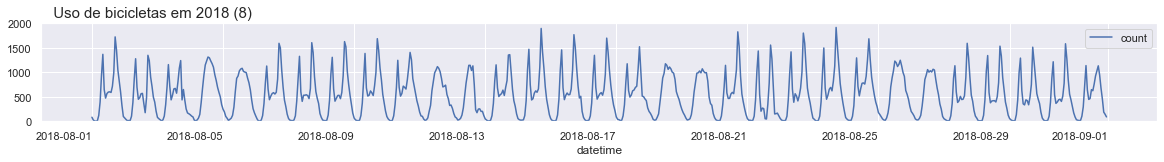

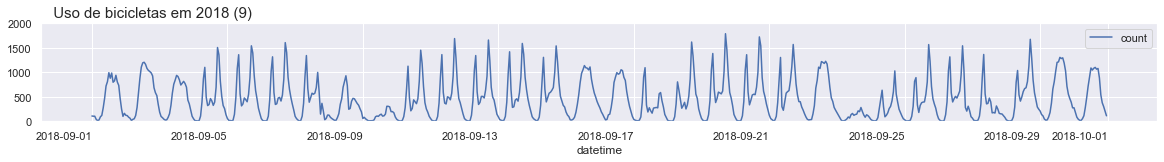

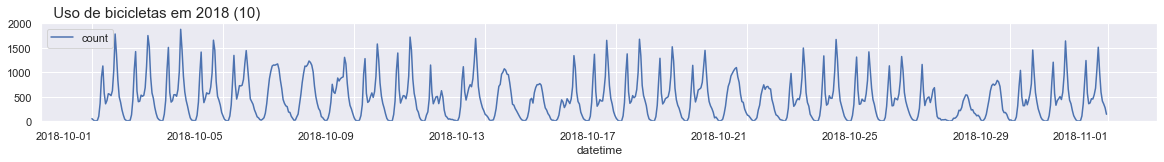

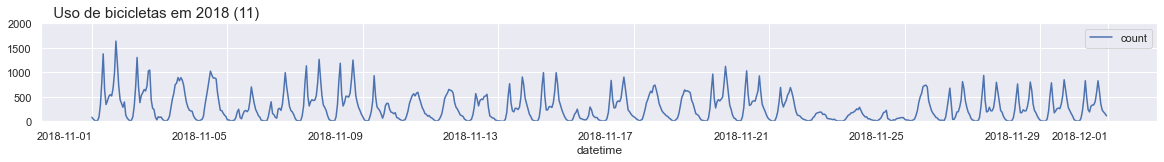

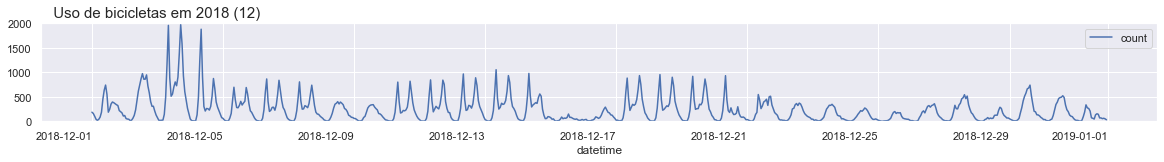

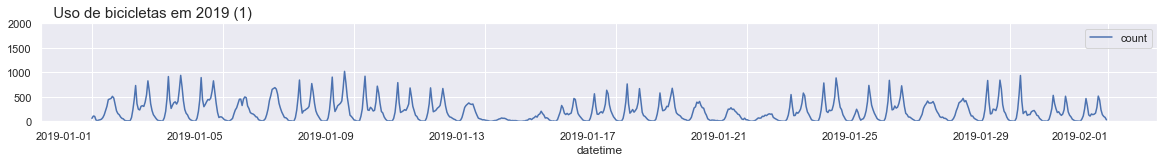

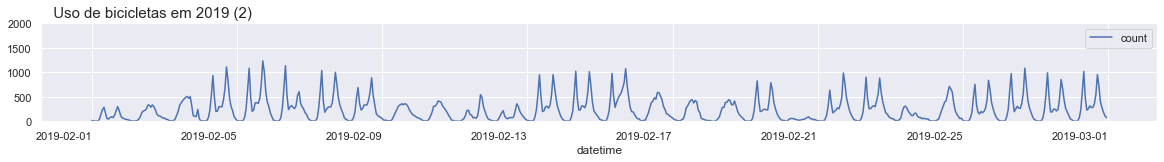

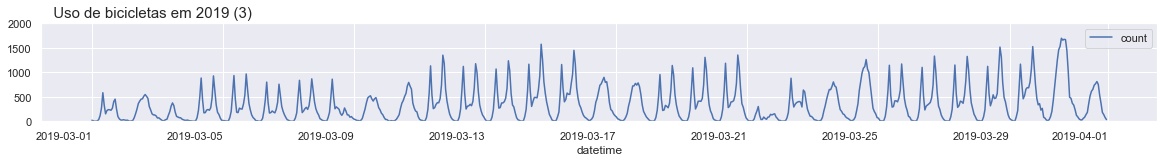

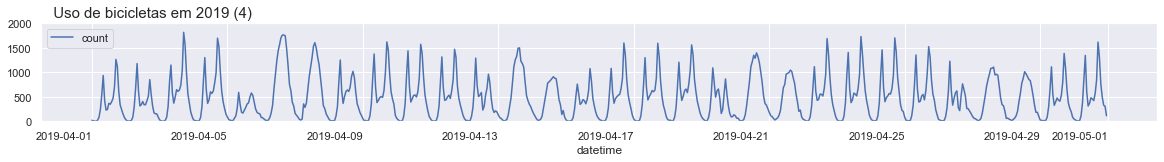

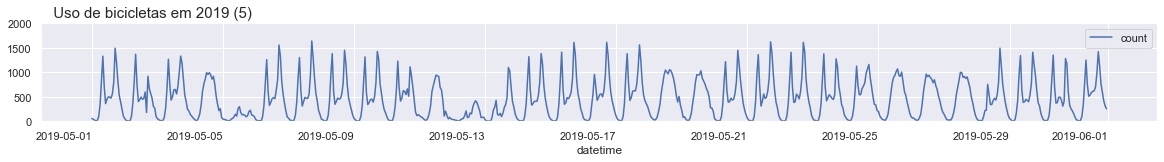

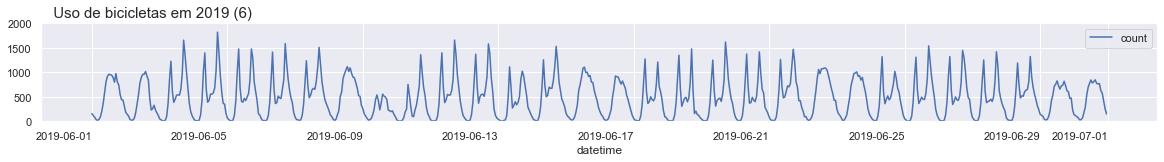

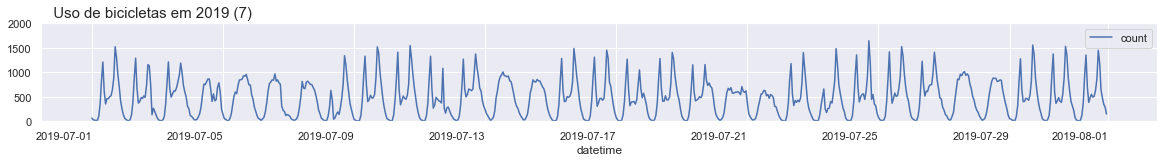

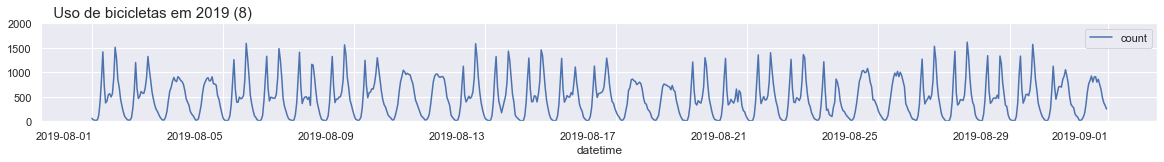

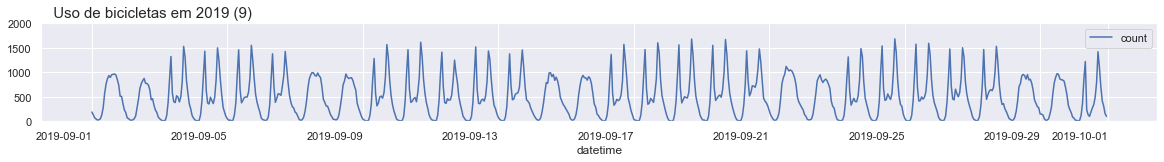

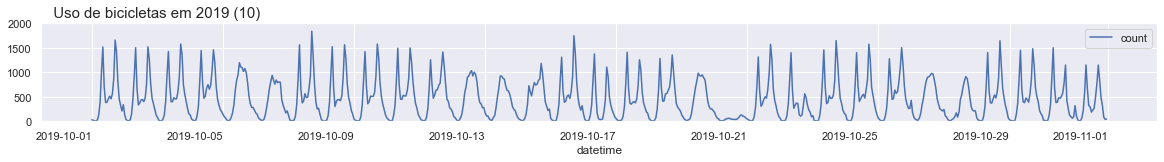

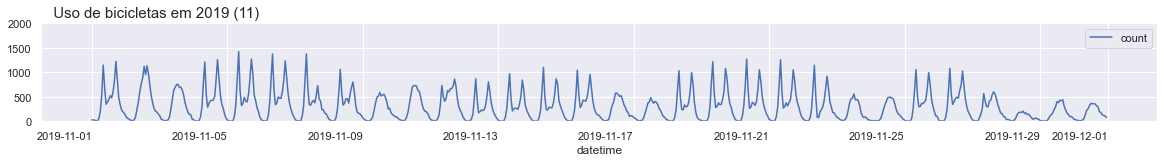

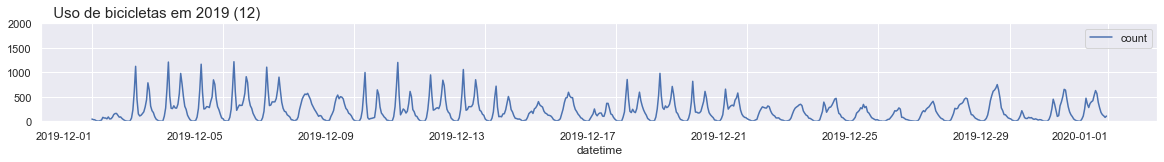

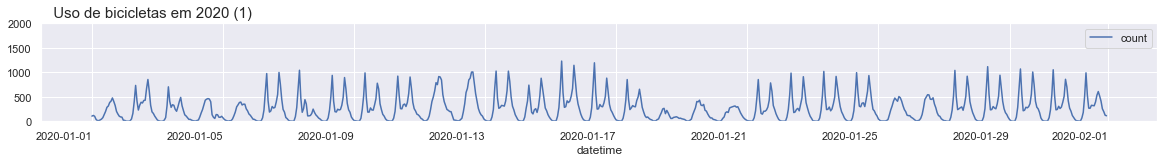

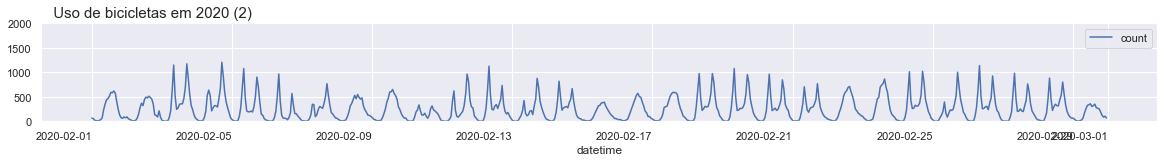

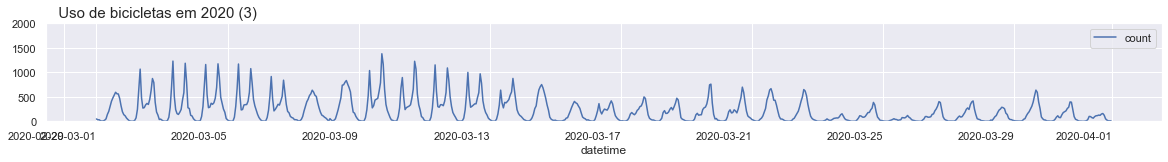

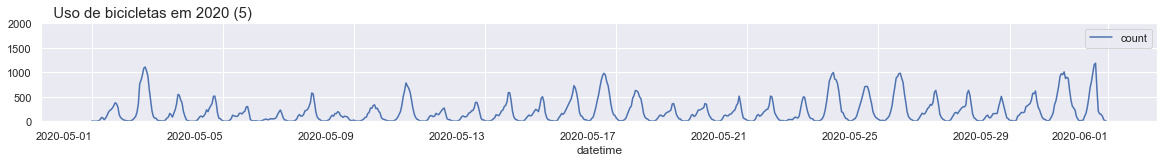

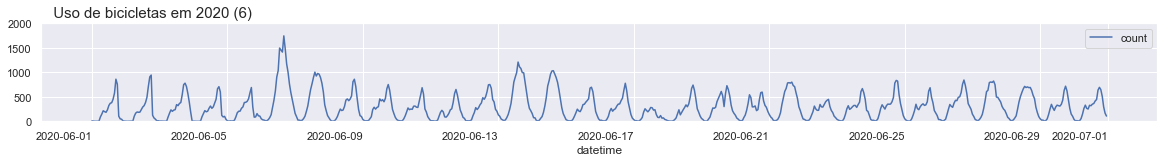

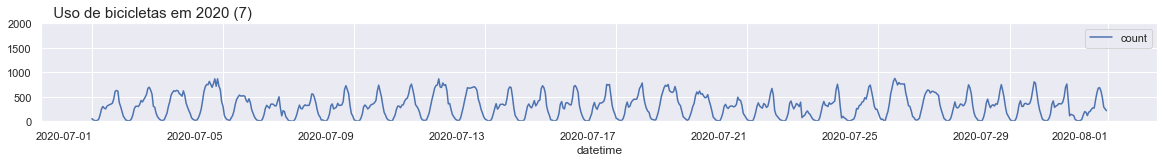

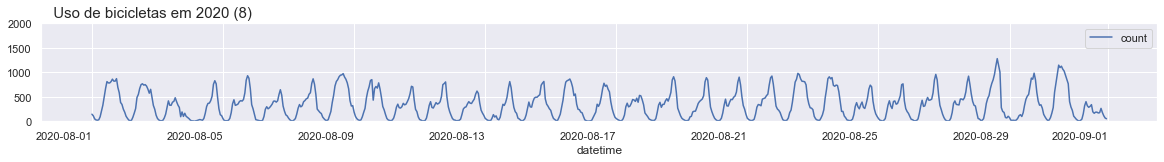

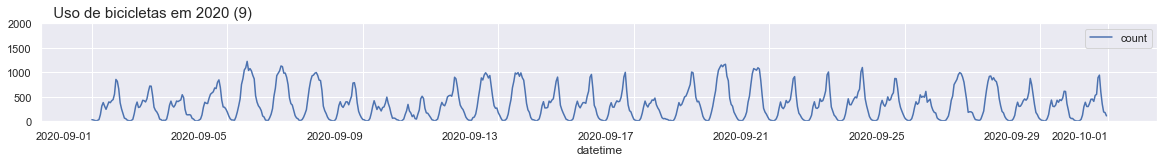

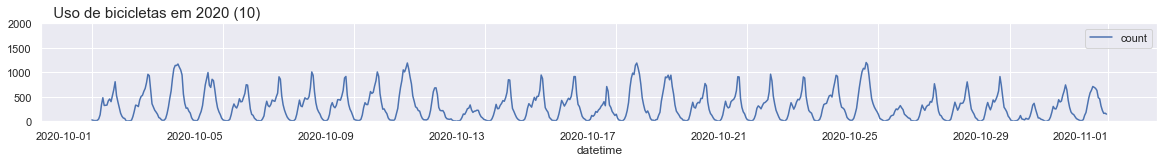

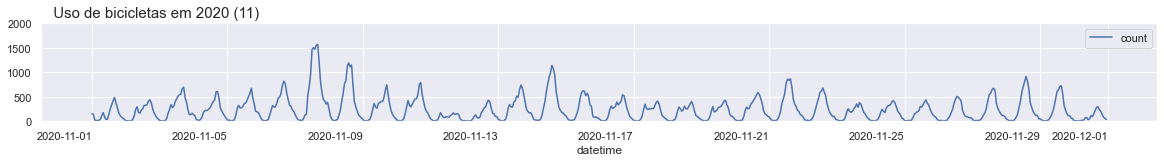

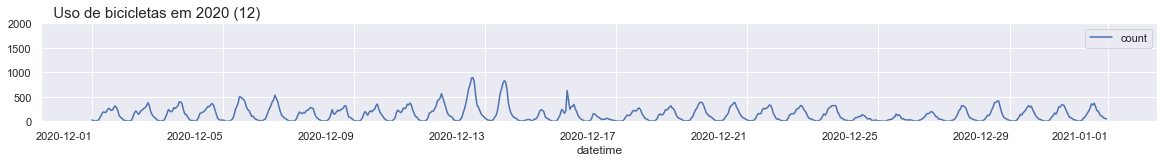

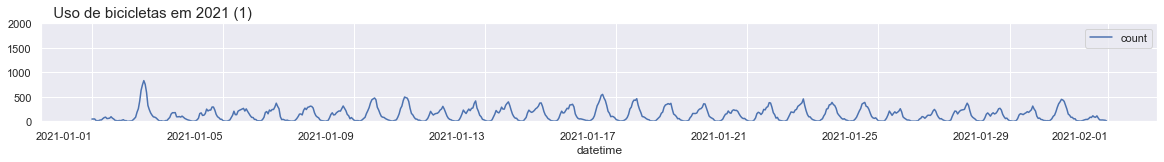

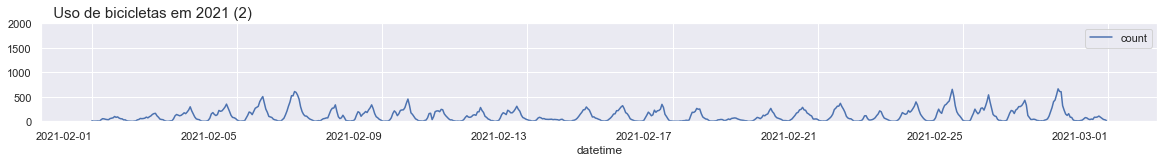

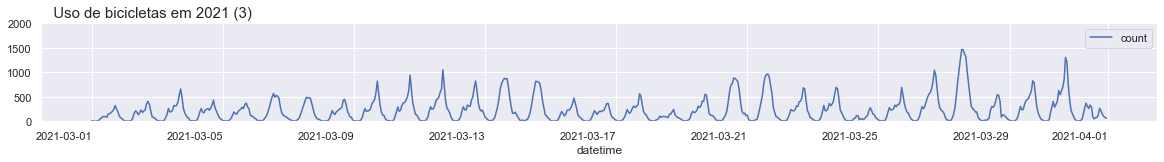

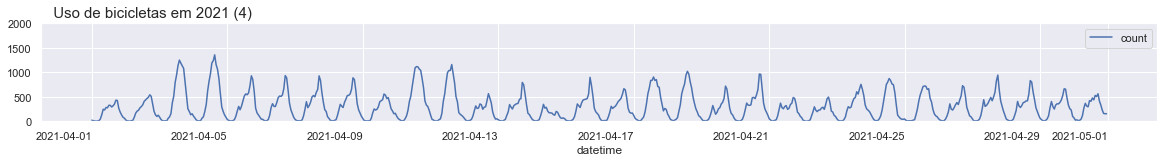

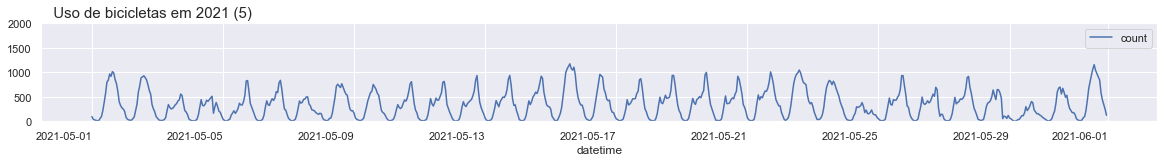

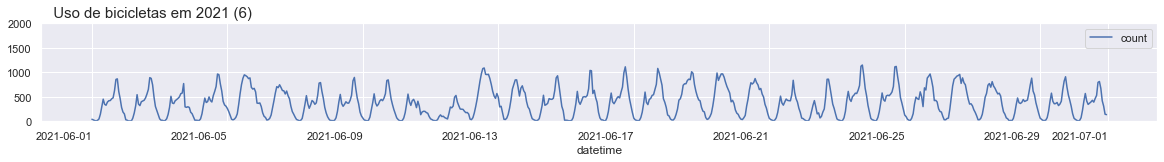

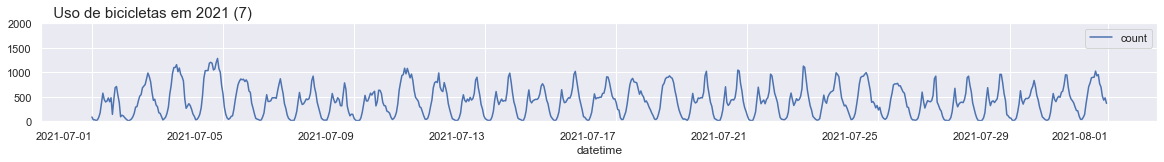

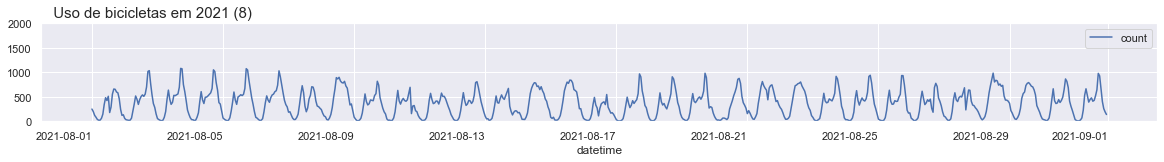

In [20]:
# Séries temporais
for ano in [2018,2019,2020,2021]:
    for mes in range(1,13,1):
        temp = df[(df.year==ano)&(df.month==mes)]
        if len(temp)>0:
            temp[['count']].set_index(temp['datetime']).plot(kind='line',figsize=(20,2),ylim=(0,2000),rot=0)
            plt.title('   Uso de bicicletas em '+str(ano)+f' ({mes})',loc='left',fontsize=15)
            plt.show()

In [21]:
# Eliminando o fator 'pandemia'
df = df[df['year']<2020]

 
January


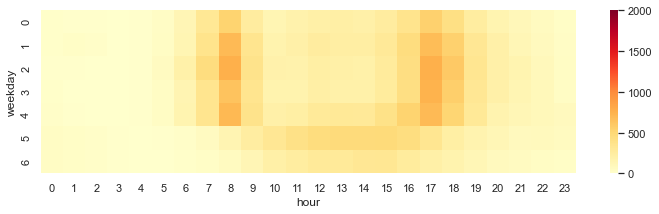

February


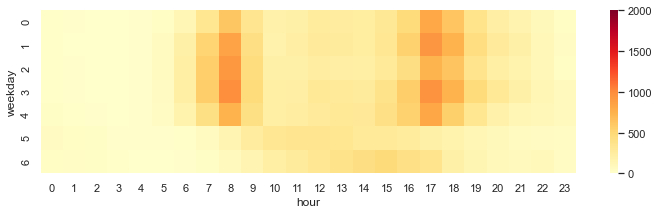

March


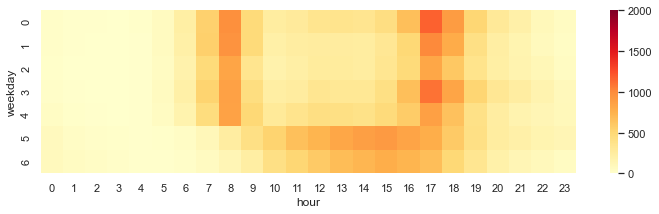

April


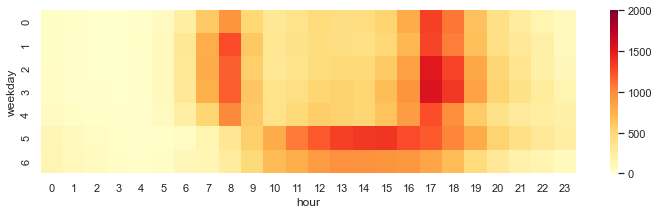

May


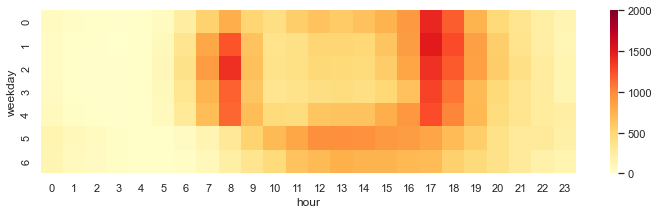

June


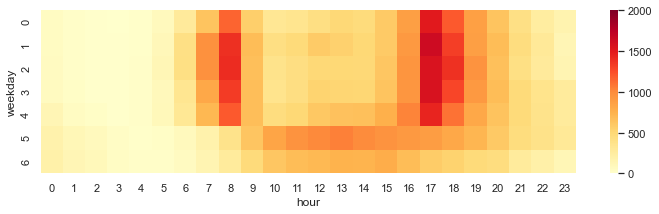

July


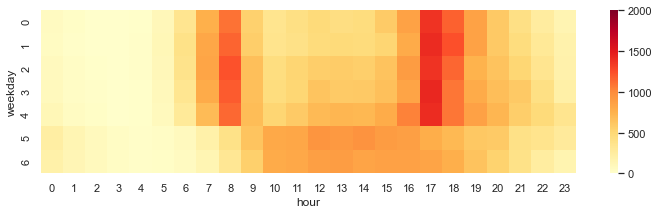

August


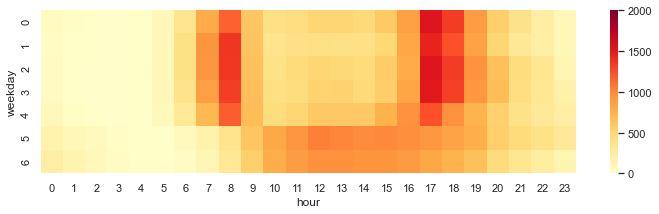

September


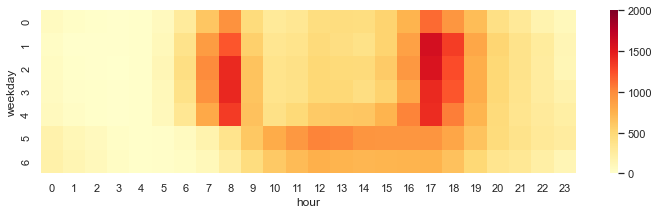

October


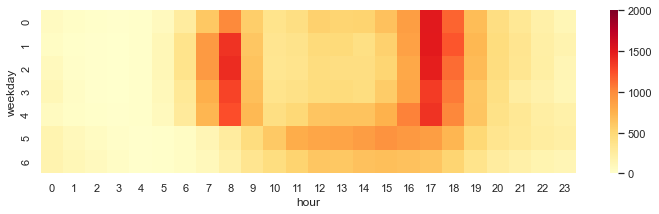

November


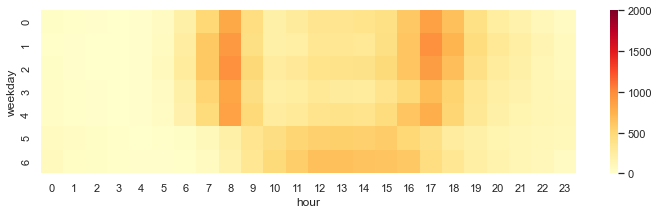

December


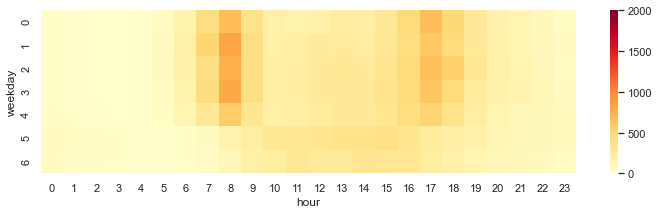

In [22]:
# Mapa de calor do uso médio de bicicletas para os meses de janeiro a dezembro
sns.set(rc={'figure.figsize':(15,2)})
t = df.pivot_table(index=['weekday'],columns=['month','hour'],values='count',aggfunc='mean')
m = pd.date_range(start='2021',end='2022',freq='M').month_name()
print(' ')
for i in range(1,13):
    print(m[i-1])
    _, ax = plt.subplots(1,1,figsize=(12,3))
    sns.heatmap(t[i],cmap='YlOrRd',vmin=0,vmax=2000,xticklabels=range(0,24))
    plt.show()

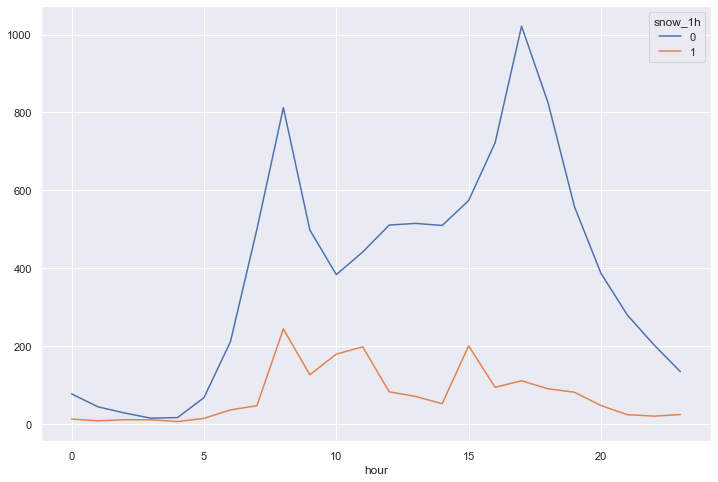

In [23]:
# Verificando o impacto da neve no uso de bicicletas
pd.crosstab(index=[df['hour']],columns=df['snow_1h'].apply(lambda x: 1 if x > 0 else 0),
            values=df['count'],aggfunc='mean').plot(figsize=(12,8));

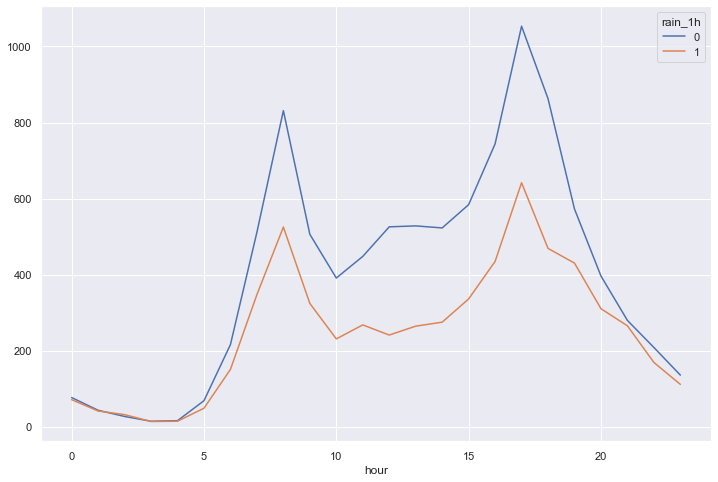

In [24]:
# Verificando o impacto da chuva no uso de bicicletas
pd.crosstab(index=[df['hour']],columns=df['rain_1h'].round(1).apply(lambda x: 1 if x > 1 else round(x)),
            values=df['count'],aggfunc='mean').plot(figsize=(12,8));

In [25]:
# Ao analisar o gráfico, decidi transformar 'snow_1h' numa variável categórica binária
df['snow'] = df['snow_1h'].apply(lambda x: 1 if x > 0 else 0)

In [26]:
# Também transformei o 'rain_1h' em variável categórica binária
df['rain'] = df['rain_1h'].apply(lambda x: 1 if x > 1 else round(x))

In [27]:
# Selecionando as features
cat_columns = ['hour','weekday','month','weather_main','holiday','snow','rain']
num_columns = ['temp','clouds_all','pressure', 'humidity']
target = 'count'
df_refined = df[cat_columns + num_columns + [target]]

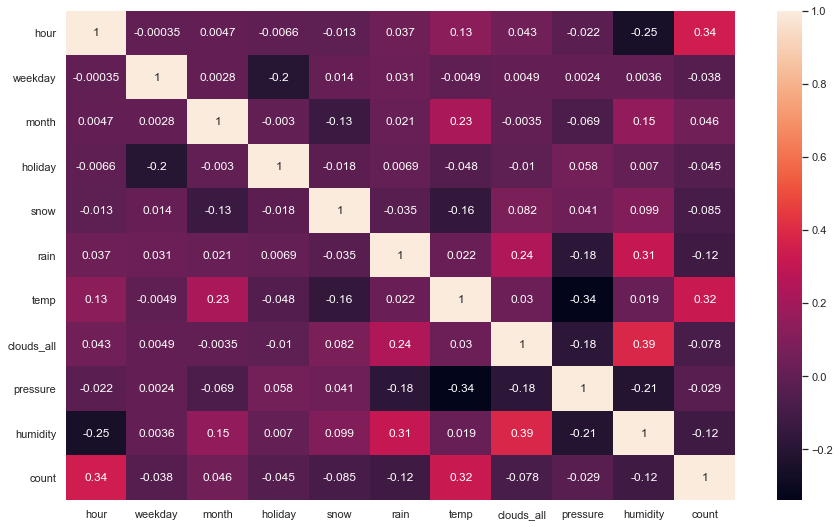

In [28]:
# Correlações
_, ax = plt.subplots(1, 1, figsize=(15,9))
sns.heatmap(df_refined.corr(), annot=True,ax=ax);

___
### Validação cruzada

In [29]:
# Modelos a serem testados
modelos = {
    'RandomForestRegressor':RandomForestRegressor(random_state=2222),
    'Linear Regression':LinearRegression()
}

In [30]:
# Tratamento das variáveis
transformation = make_column_transformer(
    (MinMaxScaler(),num_columns), # Colunas numéricas
    (OneHotEncoder(handle_unknown = 'ignore'),cat_columns), # Colunas categóricas
    remainder='passthrough')

In [31]:
# Avaliando modelos
for m in modelos.keys():
    pipeline = make_pipeline(transformation,modelos[m])
    resultados = cross_validate(pipeline,
                                X = df_refined.drop(target, axis = 1),
                                y = df_refined[target],
                                cv = 3,
                                scoring='r2',
                                return_train_score=True)
    print('\n',m,'\n','-'*18,sep='')
    print('Treino       ', "%.2f" % resultados['train_score'].mean().round(2))
    print('Teste        ', "%.2f" % resultados['test_score'].mean().round(2),'\n')


RandomForestRegressor
------------------
Treino        0.99
Teste         0.85 


Linear Regression
------------------
Treino        0.68
Teste         0.65 



___
### Escolhendo o modelo e ajustando os parâmetros

In [32]:
# Preparando a pipeline
pipeline = make_pipeline(transformation,modelos['RandomForestRegressor'])

In [33]:
# # Visualizando os parâmetros possíveis
# list(pipeline.get_params().keys())

In [34]:
# Definindo range de parâmetros a serem testados
grid = {f'randomforestregressor__n_estimators':[10,20,30],
        f'randomforestregressor__max_features':["auto", "sqrt", "log2"],
        f'randomforestregressor__min_samples_leaf':[2,4,8],
        f'columntransformer__minmaxscaler__feature_range':[(-2,2),(0,1)],
        f'randomforestregressor__bootstrap':[True, False]}

In [35]:
# Separando as features da target
X = df_refined.drop(target,axis=1)
y = df_refined[target]

# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2222)

In [36]:
# print('MÉTRICAS\n','-'*30,sep='')
# for i in sklearn.metrics.SCORERS.keys(): print(f'\'{i}\',')

In [37]:
# Preparando o Grid Search
gcv = GridSearchCV(pipeline,param_grid=grid,cv=3,return_train_score=True,scoring='r2');

# Fitando
gcv.fit(X_train,y_train);

In [38]:
# Observando os melhores resultados
cv_results = pd.DataFrame(gcv.cv_results_)
cond = (cv_results.mean_train_score < 0.95) & (cv_results.mean_test_score > 0.85)
cv_results[cond][['mean_train_score','mean_test_score','rank_test_score']]\
.sort_values('rank_test_score').round(3)

,mean_train_score,mean_test_score,rank_test_score
59,0.937,0.869,5
5,0.937,0.869,6
58,0.936,0.868,7
4,0.936,0.868,8
57,0.932,0.863,11
3,0.932,0.862,12
62,0.901,0.855,13
8,0.901,0.854,14
61,0.900,0.853,15
7,0.900,0.853,16


In [39]:
# Escolhendo os parâmetros
index = 59
cv_results.iloc[index,4:9]

param_columntransformer__minmaxscaler__feature_range    (0, 1)
param_randomforestregressor__bootstrap                    True
param_randomforestregressor__max_features                 auto
param_randomforestregressor__min_samples_leaf                4
param_randomforestregressor__n_estimators                   30
Name: 59, dtype: object

In [40]:
# Treinando o modelo final
transformation = make_column_transformer(
    (MinMaxScaler(feature_range=(0,1)),num_columns), # Colunas numéricas
    (OneHotEncoder(handle_unknown = 'ignore'),cat_columns), # Colunas categóricas
    remainder='passthrough')
rf = RandomForestRegressor(bootstrap=True,min_samples_leaf=4,
                           max_features='auto',n_estimators=30,random_state=2222)
final_pipeline = make_pipeline(transformation,rf)
final_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['temp', 'clouds_all',
                                                   'pressure', 'humidity']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['hour', 'weekday', 'month',
                                                   'weather_main', 'holiday',
                                                   'snow', 'rain'])])),
                ('randomforestregressor',
                 RandomForestRegressor(min_samples_leaf=4, n_estimators=30,
                                       random_state=2222))])

In [41]:
# Fazendo previsões e avaliando as métricas
y_pred = final_pipeline.predict(X_test)
print('mean absolute error:  ', mean_absolute_error(y_test,y_pred).round(3))
print('r2_score:             ', r2_score(y_test,y_pred).round(4))

mean absolute error:   72.463
r2_score:              0.89


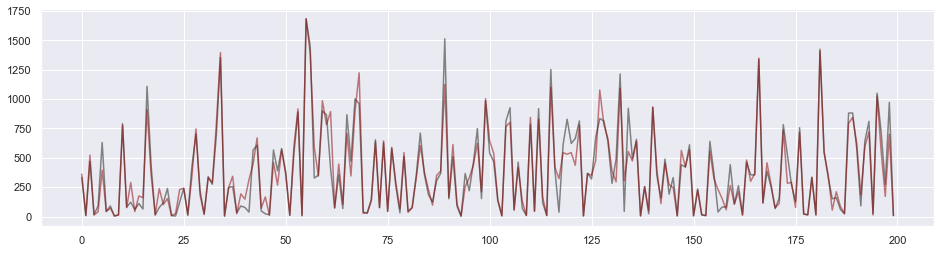

In [42]:
# Comparando o real (cinza) com o predito (vermelho)
pd.Series(y_test.reset_index(drop=True)[0:200]).plot(color='gray')
pd.Series(y_pred[0:200]).plot(figsize=(16,4),color='darkred',alpha=0.5);

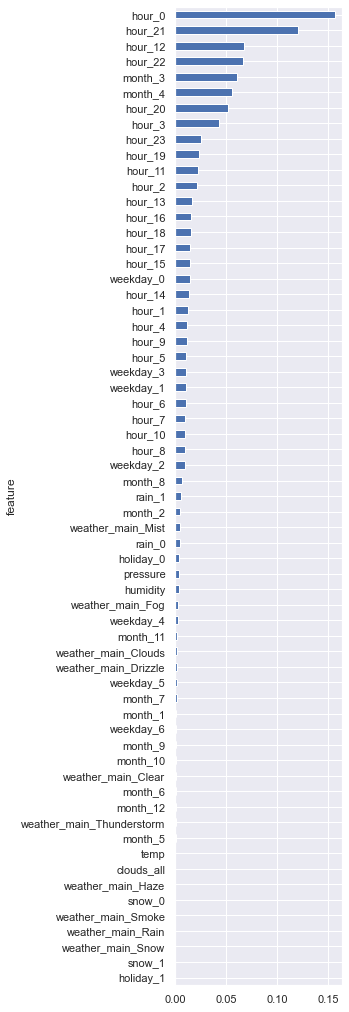

In [43]:
# Observando a importância das features
fi = {'feature':list(OneHotEncoder().fit(X_train[cat_columns]).get_feature_names(cat_columns)) + num_columns,
      'importance':list(gcv.best_estimator_.named_steps["randomforestregressor"].feature_importances_)}
fi = pd.DataFrame(fi)
fi.sort_values('importance').set_index('feature',drop=True)['importance'].plot(kind='barh',figsize=(3,18));

# Resultados
___
* Com a análise exploratória, percebemos que o melhor período do dia para fazer manutenções é de 22h às 5h, em todos os dias da semana e em todos os meses, já que a demanda é mais baixa.
* A demanda total diária sofre variações ao longo dos meses, caindo gradativamente quando o inverno se aproxima.
* Dentro desse comportamento mais geral dos usuários, algumas variações são percebidas em virtude das condições climáticas específicas do dia, que são consideradas pelo modelo de regressão treinado. 
* Portanto, a empresa pode se basear nos gráficos apresentados para traçar um planejamento mais geral e utilizar o modelo de regressão para pensar ações que precisam de um poder de previsão mais sofisticado.
* Grandes eventos culturais e fatos políticos/econômicos extraordinários podem tornar a demanda imprevisível para o modelo e, portanto, é importante estar atento a isso.